In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/emoji_uncleaned.csv")
df.head(5)

,Tweet,Label
0,A little throwback with my favourite person @ ...,0
1,glam on @user yesterday for #kcon makeup using...,7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,0
4,Who never... @ A Galaxy Far Far Away,2


In [3]:
import preprocessor as p
def preprocess_tweet(row):
    text = row['Tweet']
    text = p.clean(text)
    return text

In [4]:
df['Tweet'] = df.apply(preprocess_tweet, axis=1)
df.head()

,Tweet,Label
0,A little throwback with my favourite person Wa...,0
1,"glam on yesterday for makeup using in ,",7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO Walt Disney Magic Kingdom,0
4,Who never... A Galaxy Far Far Away,2


In [5]:
df['Tweet'] = df['Tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
df.head()

/var/folders/p6/9vz93_jn0w35pcs_knjyd76r0000gn/T/ipykernel_8289/58057856.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet'] = df['Tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


,Tweet,Label
0,a little throwback with my favourite person wa...,0
1,glam on yesterday for makeup using in,7
2,democracy plaza in the wake of a stunning outc...,11
3,then amp now vilo walt disney magic kingdom,0
4,who never a galaxy far far away,2


In [6]:
 df.drop_duplicates(inplace=True)
print('after drop duplicates', df.shape)

after drop duplicates (49728, 2)


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words='english')
X = vectorizer.fit_transform(df.Tweet)

In [8]:
y = df["Label"].values

In [9]:
from sklearn.model_selection import train_test_split

#X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101, stratify=y,shuffle = True)

In [16]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=101,sampling_strategy='minority')
X_train,y_train = os.fit_resample(X_train, y_train)

In [17]:
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

Training X Dim  (181380, 33449)
Training y Dim  (181380,)


In [18]:
from sklearn.naive_bayes import MultinomialNB


NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [19]:
import itertools


def plot_confusion_matrix(cm, classes, normalize=True,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix


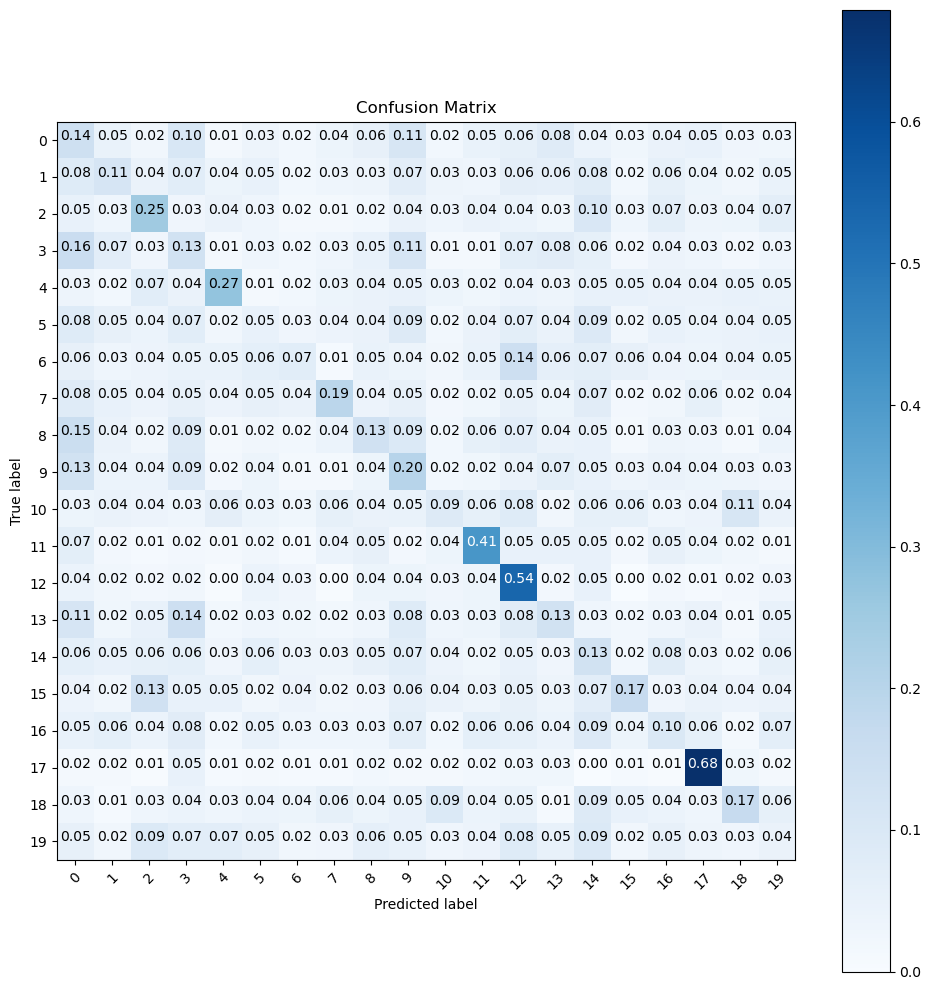

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)

plot_confusion_matrix(cm, [i for i in range(20)] ,title='Confusion Matrix', normalize=True)

In [21]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.34      0.14      0.20      1600
           1       0.25      0.11      0.16       788
           2       0.43      0.25      0.32       784
           3       0.11      0.13      0.12       432
           4       0.35      0.27      0.30       376
           5       0.07      0.05      0.06       346
           6       0.12      0.07      0.09       306
           7       0.20      0.19      0.20       282
           8       0.11      0.13      0.12       268
           9       0.09      0.20      0.12       249
          10       0.09      0.09      0.09       231
          11       0.25      0.41      0.31       225
          12       0.21      0.54      0.30       218
          13       0.07      0.13      0.09       202
          14       0.06      0.13      0.08       206
          15       0.14      0.17      0.15       187
          16       0.06      0.10      0.07       196
          17       0.31    